In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tqdm import tqdm

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import plot_model


import h5py

In [2]:
data_dir = '/Users/ferasaltwal/Documents/DSI/Capstone/extracted-png-sorted'
categories = ['AD', 'CN']

In [3]:
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ferasaltwal/Documents/DSI/Capstone/extracted-png-sorted/AD'

In [101]:
print(img_array.shape)

(192, 192)


In [102]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


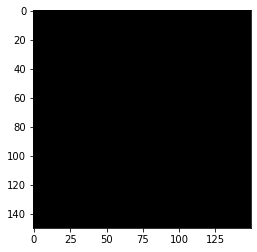

In [103]:
img_size = 150

new_arrray = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_arrray, cmap='gray')
plt.show()

In [7]:
print(new_arrray.shape)

(150, 150)


In [8]:
#adopted from sentdex keras tutuorial
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_arrray = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_arrray, class_num])
            except Exception as e:
                pass

In [9]:
create_training_data()

100%|██████████| 12285/12285 [00:22<00:00, 543.89it/s]


In [10]:
print(len(training_data))

22659


In [11]:
import random

random.shuffle(training_data)

In [12]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
0
0
0
1
1
1


In [13]:
X = []
y = []

In [14]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [15]:
# import pickle
# pickle_out = open('X.pickle', 'wb')
# pickle.dump(X, pickle_out)
# pickle_out.close()

In [16]:
#this is how you load the model if needed
# X = pickle.load(open('X.pickle', 'rb'))

In [17]:
X = X/255.0

In [18]:
y = np.array(y)

In [20]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, 3)

In [7]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (150, 150, 1),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [62]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history = model.fit(X, y, batch_size=200, epochs = 5, validation_split=0.2)

Epoch 1/5
91/91 [==============================] - 355s 4s/step - loss: 0.7270 - accuracy: 0.5432 - val_loss: 0.6822 - val_accuracy: 0.6017
Epoch 2/5
91/91 [==============================] - 342s 4s/step - loss: 0.6304 - accuracy: 0.6346 - val_loss: 0.5571 - val_accuracy: 0.7213
Epoch 3/5
91/91 [==============================] - 340s 4s/step - loss: 0.4894 - accuracy: 0.7612 - val_loss: 0.3985 - val_accuracy: 0.8257
Epoch 4/5
91/91 [==============================] - 337s 4s/step - loss: 0.3215 - accuracy: 0.8609 - val_loss: 0.2244 - val_accuracy: 0.9144
Epoch 5/5
91/91 [==============================] - 326s 4s/step - loss: 0.1691 - accuracy: 0.9345 - val_loss: 0.1263 - val_accuracy: 0.9568


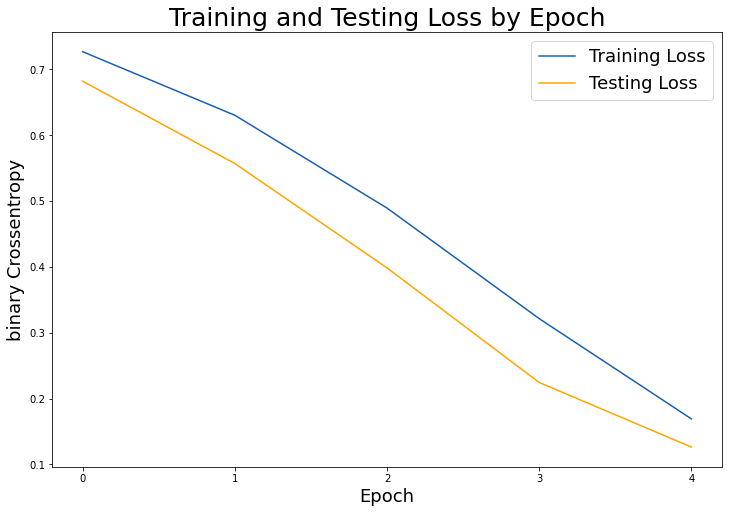

In [64]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('binary Crossentropy', fontsize = 18)
plt.xticks(np.arange(5), np.arange(5))

plt.legend(fontsize = 18);

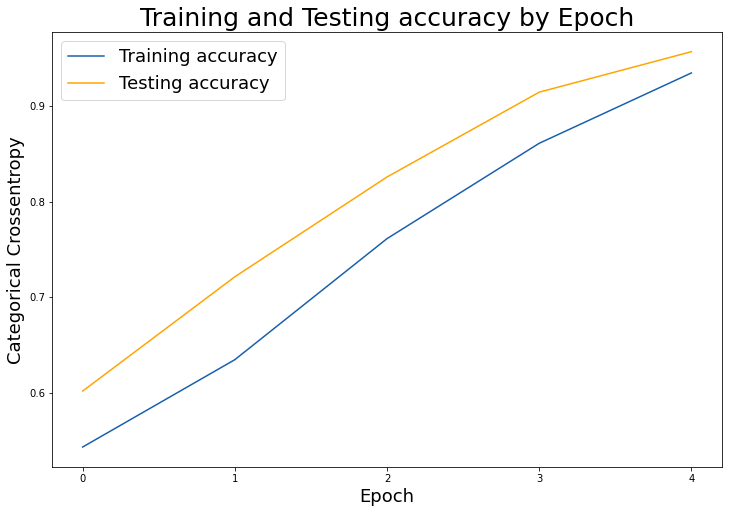

In [65]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_acc, label='Training accuracy', color='#185fad')
plt.plot(test_acc, label='Testing accuracy', color='orange')

# Set title
plt.title('Training and Testing accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(np.arange(5), np.arange(5))

plt.legend(fontsize = 18);

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [28]:
# model.save('second_3_class_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: second_3_class_model/assets


----
**Let's try predicting images that the model was not trained on**

In [26]:
categories

['AD', 'CN']

In [67]:
#let's write a function to preprocess new images to feed into the model
def prepare_img(filepath):
    img_size = 150
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size, 1)

In [68]:
test_path = '/Users/ferasaltwal/Documents/DSI/Capstone/Capstone-DSIR-824/test-img'

In [69]:
prediction = model.predict([prepare_img(os.path.join(test_path, 'CN2.png'))])

In [70]:
prediction[0][0]

1.0

In [71]:
if prediction[0][0] == 1:
    print('AD')
elif prediction[0][1] == 1:
    print('MCI')
elif prediction[0][2] == 1:
    print('CN')

AD


In [72]:
path_AD_test = '/Users/ferasaltwal/Documents/DSI/Capstone/test_images/png_sorted/AD'
path_CN_test = '/Users/ferasaltwal/Documents/DSI/Capstone/test_images/png_sorted/CN'

In [73]:
pred_list_AD = []
for img in os.listdir(path_AD_test):
    if img != '.DS_Store':
        prediction = model.predict([prepare_img(os.path.join(path_AD_test, img))])
        if int(prediction[0][0]) == 0:
            pred_list_AD.append('AD')
#         elif prediction[0][1] == 1:
#             pred_list.append('MCI')
        elif int(prediction[0][0]) == 1:
            pred_list_AD.append('CN')

In [74]:
len(pred_list_AD)

3276

In [75]:
pred_list_AD.count('AD')

2363

In [76]:
pred_list_AD.count('CN')

913

In [77]:
2363/3248

0.7275246305418719

In [78]:
pred_list_CN = []
for img in os.listdir(path_CN_test):
    if img != '.DS_Store':
        prediction = model.predict([prepare_img(os.path.join(path_CN_test, img))])
        if int(prediction[0][0]) == 0:
            pred_list_CN.append('AD')
#         elif prediction[0][1] == 1:
#             pred_list.append('MCI')
        elif int(prediction[0][0]) == 1:
            pred_list_CN.append('CN')

In [79]:
len(pred_list_CN)

1638

In [80]:
pred_list_CN.count('AD')

695

In [81]:
pred_list_CN.count('CN')

943

In [83]:
943/1638

0.5757020757020757